In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [3]:
# Load the dataset
file_path = 'heart_disease.xlsx'
data = pd.read_excel(file_path, sheet_name='Heart_disease')

# Display the first 5 rows of the dataset
print(data.head())

   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0  


In [4]:
# Exploratory Data Analysis (EDA)
# Check for missing values
print(data.isnull().sum())

# Check for inconsistencies in the data
print(data.describe())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64
              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


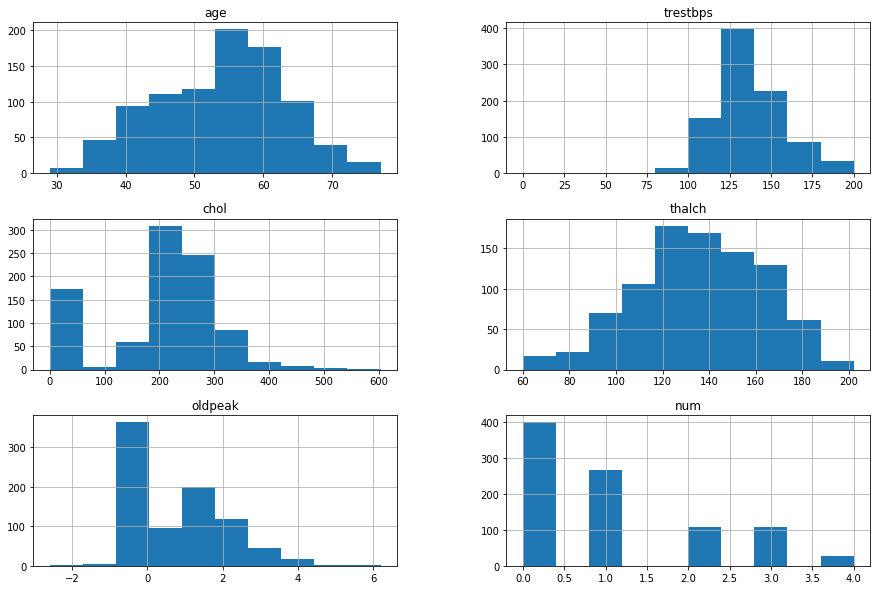

In [6]:
# Visualize the distribution of features
data.hist(figsize=(15, 10))
plt.show()

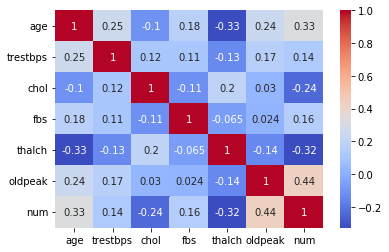

In [7]:
# Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

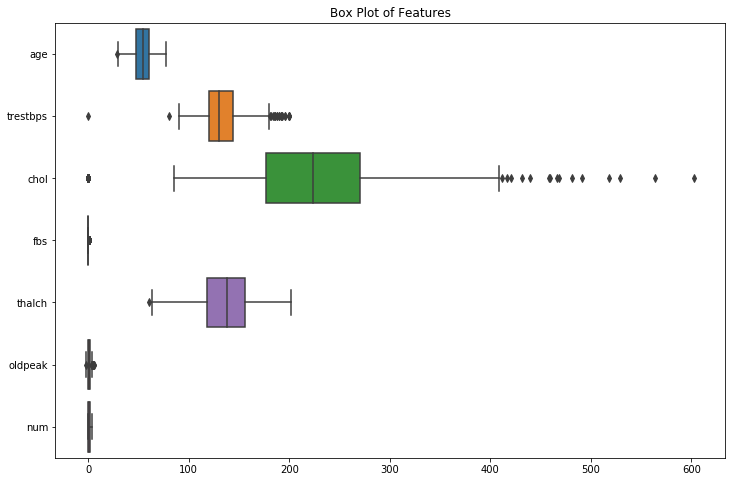

In [9]:
# Box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, orient="h")
plt.title("Box Plot of Features")
plt.show()

In [10]:
# Feature Engineering
# Handle missing values (if any)
data.fillna(data.median(), inplace=True)

C:\Users\KRISHNA TEJA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
# Check for missing values
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64


In [11]:
# Convert boolean columns to integers (0 and 1)
for col in data.select_dtypes(include=['bool']).columns:
    data[col] = data[col].astype(int)

# Convert categorical columns to strings before encoding
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype(str)

In [12]:
# Encode categorical variables
def encode_categorical(df):
    label_encoder = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = label_encoder.fit_transform(df[col])
    return df

data = encode_categorical(data)

# Ensure all columns are numeric
print("Data types after encoding:")
print(data.dtypes)

Data types after encoding:
age           int64
sex           int32
cp            int32
trestbps      int64
chol          int64
fbs           int32
restecg       int32
thalch        int64
exang         int32
oldpeak     float64
slope         int32
thal          int32
num           int64
dtype: object


In [14]:
# Split the dataset into features and target variable
X = data.drop('num', axis=1)
y = data['num']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Decision Tree Classification
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.53
Precision: 0.52
Recall: 0.53
F1-Score: 0.53
ROC-AUC: 0.60


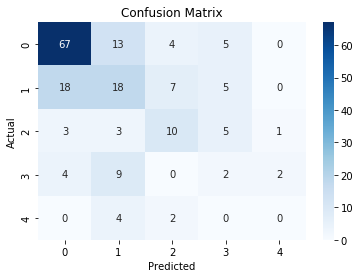

In [16]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [36]:
# Hyperparameter Tuning
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [3, 5, 7],
    'min_samples_leaf': [1, 2, 3],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [37]:
# Train the model with the best hyperparameters
best_dt_model = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=3, random_state=42)

In [38]:
# Evaluate the best model
y_pred_best = best_dt_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {accuracy_best:.2f}")

Best Model Accuracy: 0.57


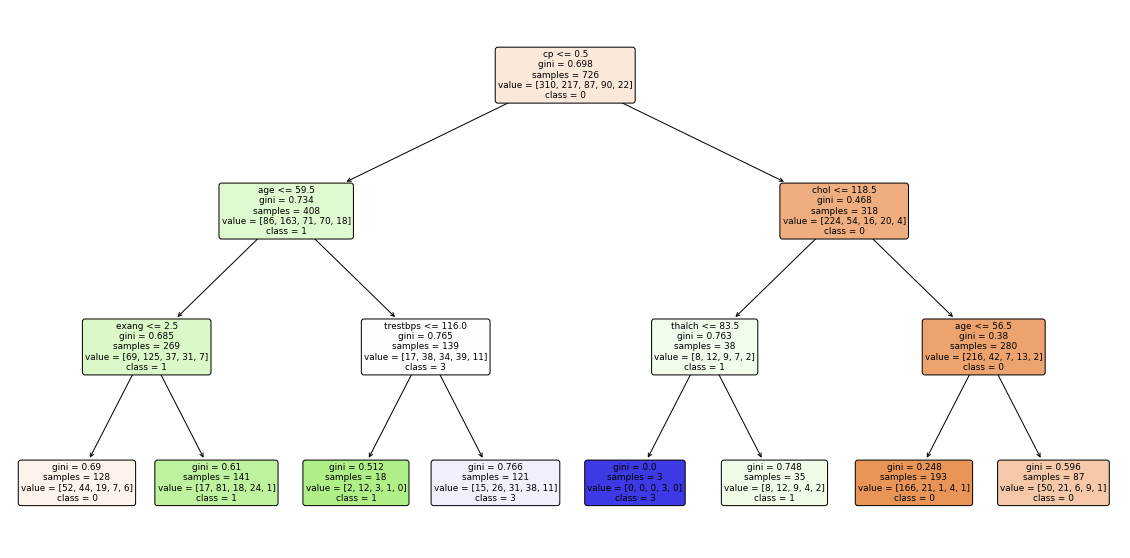

In [39]:
# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(best_dt_model, filled=True, feature_names=X.columns, class_names=[str(i) for i in np.unique(y)], rounded=True)
plt.show()

# Interview Questions:

# 1. Common hyperparameters:
   max_depth: Limits the depth of the tree. Prevents overfitting when set to a reasonable value.
   
   min_samples_split: Minimum number of samples required to split an internal node. A higher value makes the tree less complex.
   
   min_samples_leaf: Minimum number of samples that must be present in a leaf node. Prevents overfitting by ensuring leaves are not too small.
   
   criterion: Defines the function to measure the quality of a split ('gini' for Gini impurity, 'entropy' for Information Gain).
   

# 2. Label Encoding vs One-Hot Encoding:

   - Label Encoding assigns unique integer values to each category (e.g., 'Male' -> 0, 'Female' -> 1)
   
   -One-Hot Encoding Creates binary columns for each category. eg: Color: {'Red': [1,0,0], 'Green': [0,1,0], 'Blue': [0,0,1]}
